<a href="https://colab.research.google.com/github/Supriyaasapkota/Machine-Learning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

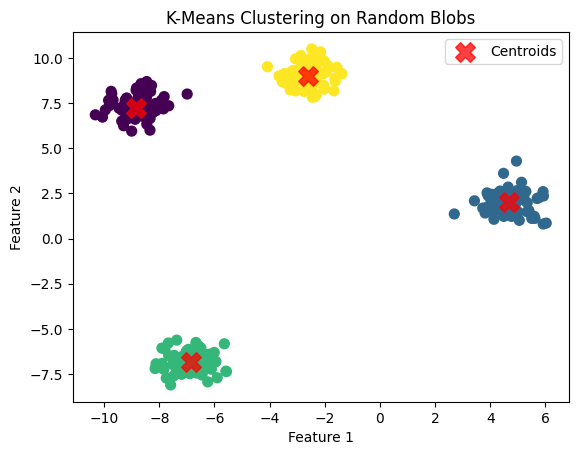

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate random dataset with blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Create and fit the KMeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Step 3: Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title('K-Means Clustering on Random Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


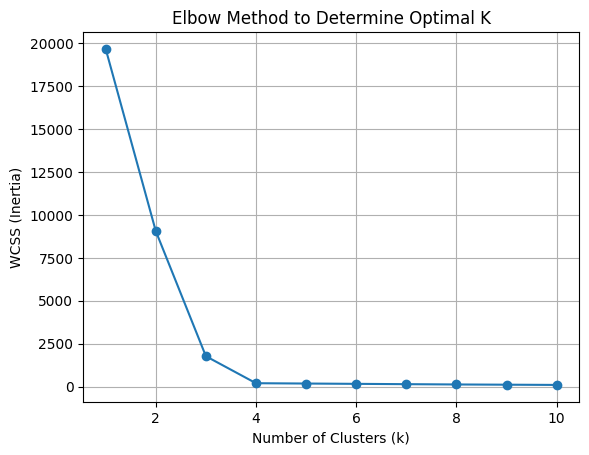

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Use the elbow method to find optimal number of clusters
wcss = []  # Within-Cluster Sum of Squares

# Try different numbers of clusters (1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ gives the WCSS

# Step 3: Plot the elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()


In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate random blobs dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply KMeans
k = 4  # Choose number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# Step 3: Compute Silhouette Score
score = silhouette_score(X, labels)
print(f"Silhouette Score for k={k}: {score:.4f}")


Silhouette Score for k=4: 0.8756


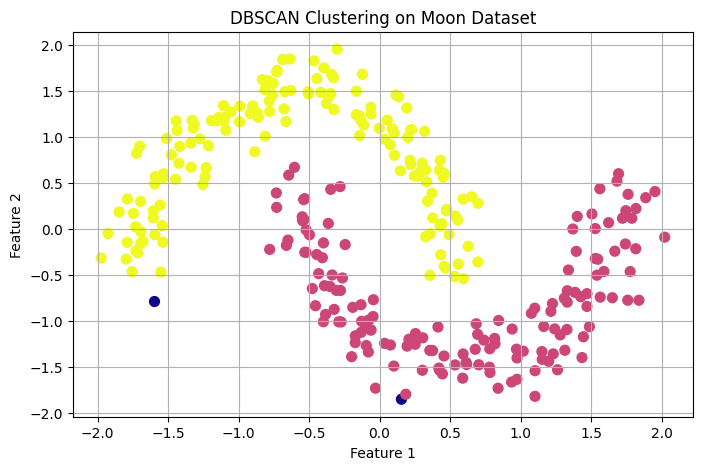

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Generate moon-shaped dataset
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 2: Standardize the features (important for DBSCAN)
X_scaled = StandardScaler().fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma', s=50)
plt.title('DBSCAN Clustering on Moon Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


Silhouette Score (excluding noise): 0.3824


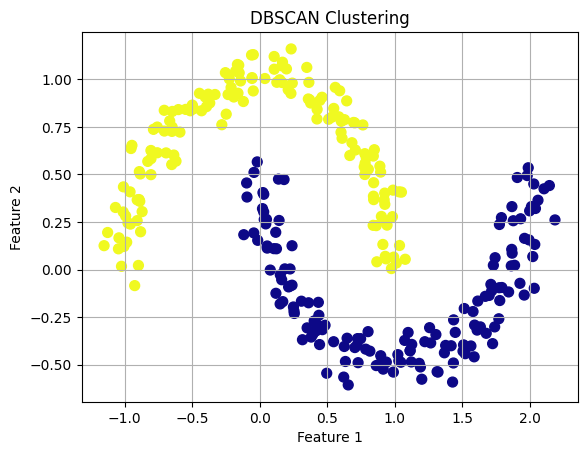

In [8]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Generate dataset (you can use any dataset here)
X, _ = make_moons(n_samples=300, noise=0.07, random_state=42)

# Step 2: Scale features (important for DBSCAN)
X_scaled = StandardScaler().fit_transform(X)

# Step 3: Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X_scaled)

# Step 4: Count clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Step 5: Calculate Silhouette Score (excluding noise)
if n_clusters >= 2:
    filtered_X = X_scaled[labels != -1]
    filtered_labels = labels[labels != -1]
    score = silhouette_score(filtered_X, filtered_labels)
    print(f"Silhouette Score (excluding noise): {score:.4f}")
else:
    print("Silhouette Score cannot be calculated (less than 2 clusters found).")

# Step 6: Optional - visualize the result
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


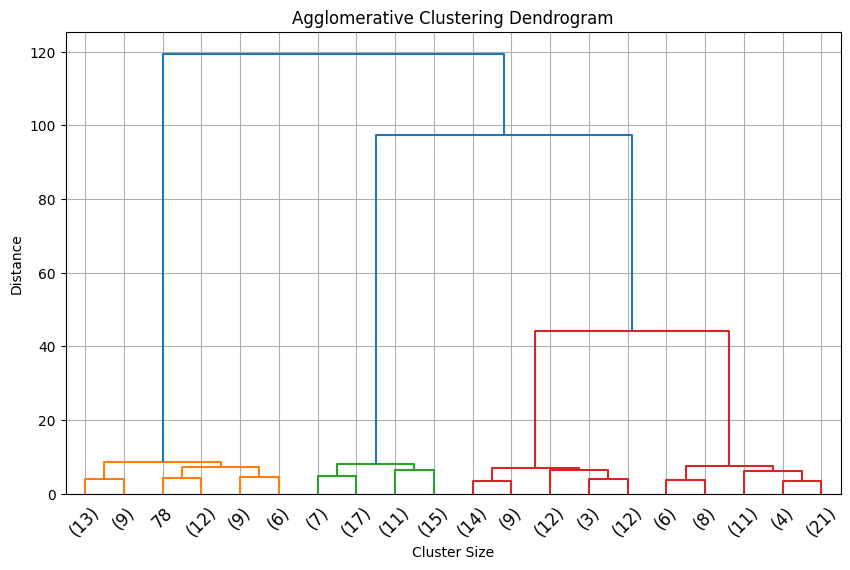

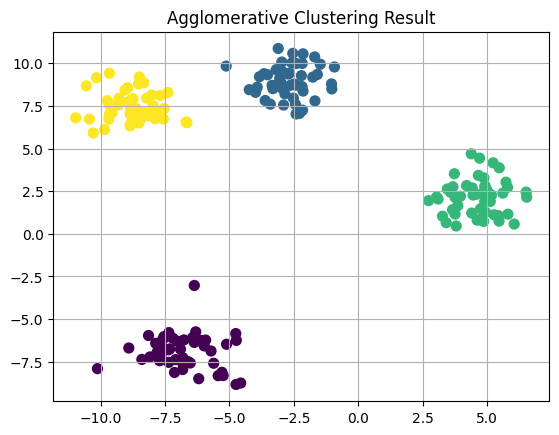

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate random dataset
X, y = make_blobs(n_samples=200, centers=4, random_state=42)

# Step 2: Create dendrogram
linked = linkage(X, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=12.)
plt.title("Agglomerative Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

# Step 3: Apply Agglomerative Clustering (fix here)
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = agg.fit_predict(X)

# Step 4: Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering Result")
plt.grid(True)
plt.show()


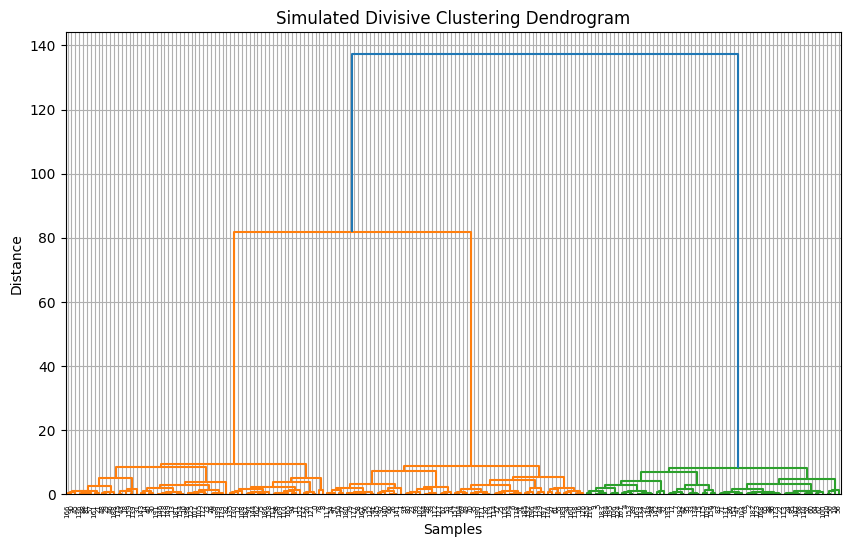

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate data
X, y = make_blobs(n_samples=200, centers=3, random_state=42)

# Compute linkage matrix
linked = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Simulated Divisive Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.grid(True)
plt.show()
